# Brainstorming

Ideas for next post:
* Run next mile interval at speed
* parse track workout files.....for what? 
* What is an issue I am still trying to figure out?
* Muscle soreness
* Balancing muscle/weight gain with the need to fuel properly
* Look up qualifying race course elevation

In [1]:
import sys
import pandas as pd
import os

bq_path = '/Users/aishaellahi/py2/bq'
sys.path.append(bq_path)
import bq

os.chdir("marathon_tcx/")

In [3]:
bigsur_laps = bq.parse_lap_metrics("20170430_bigsurmarathon.tcx")
nvm_laps = bq.parse_lap_metrics("20150301_nvmmarathon.tcx")

In [123]:
reload(bq)

<module 'bq' from '/Users/aishaellahi/py2/bq/bq.py'>

In [124]:
x = bq.parse_lap_metrics("20150301_nvmmarathon.tcx")

In [125]:
x[0]

{'altitude_meters': u'112.61',
 'distance_meters': u'0.0',
 'position': OrderedDict([(u'LatitudeDegrees', u'38.58525621891022'),
              (u'LongitudeDegrees', u'-122.57054662704468')]),
 'time': u'2015-03-01T07:00:53.000-08:00'}

In [17]:
lap_df = pd.DataFrame(bigsur_laps)
lap_df = lap_df[['run_type', 'run_start', 'lap_start', 'seconds', 'meters', 'start_meters',
                'end_meters', 'start_altitude', 'end_altitude', 'average_cadence']]
lap_df['run_start'] = pd.to_datetime(lap_df['run_start'])
lap_df['lap_start'] = pd.to_datetime(lap_df['lap_start'])
lap_df.sort_values(['run_start', 'lap_start', 'start_meters'], inplace=True)
lap_df['minutes'] = lap_df['seconds'].apply(bq.seconds_to_minutes)
lap_df['miles'] = lap_df['meters'].apply(bq.meters_to_miles)
lap_df['min_per_mile'] = lap_df['minutes']/lap_df['miles']
lap_df['alt_change'] = lap_df['end_altitude'] - lap_df['start_altitude']

# Format 'run_start' to string for labeling
datetime_index_df = pd.DatetimeIndex(lap_df['run_start']).normalize()
lap_df['date'] = datetime_index_df.strftime('%D')

In [18]:
lap_df.head()

,run_type,run_start,lap_start,seconds,meters,start_meters,end_meters,start_altitude,end_altitude,average_cadence,minutes,miles,min_per_mile,alt_change,date
0,bigsurmarathon.tcx,2017-04-30 13:50:32,2017-04-30 13:50:32,533.0,1610.0,0.00,1601.50,None,None,None,8.883333,1.000408,8.879714,NaN,04/30/17
1,bigsurmarathon.tcx,2017-04-30 13:50:32,2017-04-30 13:59:25,531.0,1610.0,1601.50,3213.13,None,None,None,8.850000,1.000408,8.846394,NaN,04/30/17
2,bigsurmarathon.tcx,2017-04-30 13:50:32,2017-04-30 14:08:16,522.0,1610.0,3213.13,4827.13,None,None,None,8.700000,1.000408,8.696455,NaN,04/30/17
3,bigsurmarathon.tcx,2017-04-30 13:50:32,2017-04-30 14:16:58,498.0,1610.0,4827.13,6434.09,None,None,None,8.300000,1.000408,8.296618,NaN,04/30/17
4,bigsurmarathon.tcx,2017-04-30 13:50:32,2017-04-30 14:25:16,507.0,1610.0,6434.09,8047.57,None,None,None,8.450000,1.000408,8.446557,NaN,04/30/17


In [19]:
# plot!
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

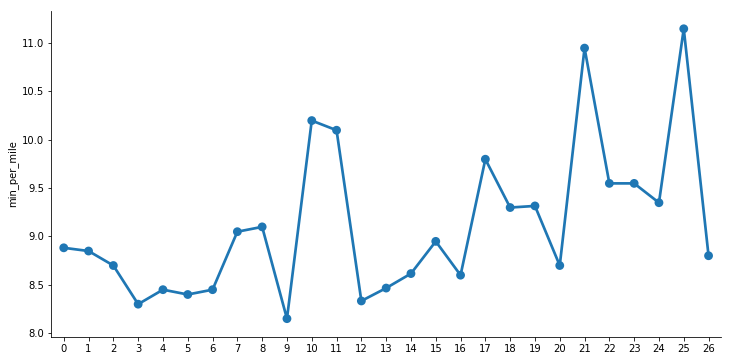

In [20]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.pointplot(x=lap_df.index.tolist(), y=lap_df['min_per_mile'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Another post idea

Using cadence training to "burn in" a specific pace 